<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [47]:
import requests
# ======================

from bs4 import BeautifulSoup
# ================================

import spacy
# ============================

from textblob import TextBlob
# =============================

from collections import Counter
# =============================

import numpy as np
# ===================================

import pandas as pd
# ===================================

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import colors
# ===================================

import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
# ==============================

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
# =========================================

import vaderSentiment
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# =========================================

import string
# ===============

import warnings
import os
# =================================================
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUSPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUSPC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUSPC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUSPC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
#Entorno de trabajo
# ==================
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M9


<div class="alert alert-block alert-info">
    <b>Texto</b></div>

Se usa el texto del inspirador y motivador discurso que Steve Jobs dió en la Universidad de Stanford en junio de 2005.

In [49]:
# Se realiza la solicitud GET a la página web de Stanford
# ======================================================
my_request = requests.get('https://news.stanford.edu/2005/06/12/youve-got-find-love-jobs-says/')

print(my_request.status_code)
print(my_request.headers)

200
{'Connection': 'keep-alive', 'Content-Length': '28591', 'Cache-Control': 'public, max-age=86400', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html; charset=UTF-8', 'Link': '<https://news.stanford.edu/wp-json/>; rel="https://api.w.org/", <https://news.stanford.edu/wp-json/wp/v2/posts/44960>; rel="alternate"; type="application/json", <https://news.stanford.edu/?p=44960>; rel=shortlink', 'Server': 'nginx', 'Strict-Transport-Security': 'max-age=300', 'X-Pantheon-Styx-Hostname': 'styx-fe1-a-8854d7986-8j4fz', 'X-Styx-Req-Id': '9b4918eb-259e-11ee-9db1-0655140b32b2', 'Age': '47893', 'Accept-Ranges': 'bytes', 'Via': '1.1 varnish, 1.1 varnish, 1.1 varnish', 'Date': 'Wed, 19 Jul 2023 08:27:36 GMT', 'X-Served-By': 'cache-chi-klot8100114-CHI, cache-chi-klot8100114-CHI, cache-mad22066-MAD', 'X-Cache': 'HIT, MISS, MISS', 'X-Cache-Hits': '124, 0, 0', 'X-Timer': 'S1689755256.149180,VS0,VE107', 'Vary': 'Accept-Encoding, Cookie'}


In [50]:
#print(my_request.text)

In [51]:
my_doc = my_request.text
doc_final = BeautifulSoup(my_doc, "html.parser")

for parrafo in doc_final.find_all("p"):
    print(parrafo.text)   

This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005.
 Go to the web site to view the video.
Steve Jobs’ 2005 Stanford Commencement Address
I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.
The first story is about connecting the dots.
I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me t

<div class="alert alert-info" role="alert">
  <strong>Exercici 1:</strong> 
    <p> Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.</p>
</div>

Creamos una variable cadena de caracteres con el texto que nos interesa.

In [52]:
texto= """I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories.
The first story is about connecting the dots.
I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We have an unexpected baby boy; do you want him?” They said: “Of course.” My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to college.
And 17 years later I did go to college. But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents’ savings were being spent on my college tuition. After six months, I couldn’t see the value in it. I had no idea what I wanted to do with my life and no idea how college was going to help me figure it out. And here I was spending all of the money my parents had saved their entire life. So I decided to drop out and trust that it would all work out OK. It was pretty scary at the time, but looking back it was one of the best decisions I ever made. The minute I dropped out I could stop taking the required classes that didn’t interest me, and begin dropping in on the ones that looked interesting.
It wasn’t all romantic. I didn’t have a dorm room, so I slept on the floor in friends’ rooms, I returned Coke bottles for the 5¢ deposits to buy food with, and I would walk the 7 miles across town every Sunday night to get one good meal a week at the Hare Krishna temple. I loved it. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. Let me give you one example:
Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed. Because I had dropped out and didn’t have to take the normal classes, I decided to take a calligraphy class to learn how to do this. I learned about serif and sans serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great. It was beautiful, historical, artistically subtle in a way that science can’t capture, and I found it fascinating.
None of this had even a hope of any practical application in my life. But 10 years later, when we were designing the first Macintosh computer, it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography. If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces or proportionally spaced fonts. And since Windows just copied the Mac, it’s likely that no personal computer would have them. If I had never dropped out, I would have never dropped in on this calligraphy class, and personal computers might not have the wonderful typography that they do. Of course it was impossible to connect the dots looking forward when I was in college. But it was very, very clear looking backward 10 years later.
Again, you can’t connect the dots looking forward; you can only connect them looking backward. So you have to trust that the dots will somehow connect in your future. You have to trust in something — your gut, destiny, life, karma, whatever. This approach has never let me down, and it has made all the difference in my life.
My second story is about love and loss.
I was lucky — I found what I loved to do early in life. Woz and I started Apple in my parents’ garage when I was 20. We worked hard, and in 10 years Apple had grown from just the two of us in a garage into a $2 billion company with over 4,000 employees. We had just released our finest creation — the Macintosh — a year earlier, and I had just turned 30. And then I got fired. How can you get fired from a company you started? Well, as Apple grew we hired someone who I thought was very talented to run the company with me, and for the first year or so things went well. But then our visions of the future began to diverge and eventually we had a falling out. When we did, our Board of Directors sided with him. So at 30 I was out. And very publicly out. What had been the focus of my entire adult life was gone, and it was devastating.
I really didn’t know what to do for a few months. I felt that I had let the previous generation of entrepreneurs down — that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me — I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over.
I didn’t see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life.
During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing woman who would become my wife. Pixar went on to create the world’s first computer animated feature film, Toy Story, and is now the most successful animation studio in the world. In a remarkable turn of events, Apple bought NeXT, I returned to Apple, and the technology we developed at NeXT is at the heart of Apple’s current renaissance. And Laurene and I have a wonderful family together.
I’m pretty sure none of this would have happened if I hadn’t been fired from Apple. It was awful tasting medicine, but I guess the patient needed it. Sometimes life hits you in the head with a brick. Don’t lose faith. I’m convinced that the only thing that kept me going was that I loved what I did. You’ve got to find what you love. And that is as true for your work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven’t found it yet, keep looking. Don’t settle. As with all matters of the heart, you’ll know when you find it. And, like any great relationship, it just gets better and better as the years roll on. So keep looking until you find it. Don’t settle.
My third story is about death.
When I was 17, I read a quote that went something like: “If you live each day as if it was your last, someday you’ll most certainly be right.” It made an impression on me, and since then, for the past 33 years, I have looked in the mirror every morning and asked myself: “If today were the last day of my life, would I want to do what I am about to do today?” And whenever the answer has been “No” for too many days in a row, I know I need to change something.
Remembering that I’ll be dead soon is the most important tool I’ve ever encountered to help me make the big choices in life. Because almost everything — all external expectations, all pride, all fear of embarrassment or failure — these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart.
About a year ago I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn’t even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor’s code for prepare to die. It means to try to tell your kids everything you thought you’d have the next 10 years to tell them in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes.
I lived with that diagnosis all day. Later that evening I had a biopsy, where they stuck an endoscope down my throat, through my stomach and into my intestines, put a needle into my pancreas and got a few cells from the tumor. I was sedated, but my wife, who was there, told me that when they viewed the cells under a microscope the doctors started crying because it turned out to be a very rare form of pancreatic cancer that is curable with surgery. I had the surgery and I’m fine now.
This was the closest I’ve been to facing death, and I hope it’s the closest I get for a few more decades. Having lived through it, I can now say this to you with a bit more certainty than when death was a useful but purely intellectual concept:
No one wants to die. Even people who want to go to heaven don’t want to die to get there. And yet death is the destination we all share. No one has ever escaped it. And that is as it should be, because Death is very likely the single best invention of Life. It is Life’s change agent. It clears out the old to make way for the new. Right now the new is you, but someday not too long from now, you will gradually become the old and be cleared away. Sorry to be so dramatic, but it is quite true.
Your time is limited, so don’t waste it living someone else’s life. Don’t be trapped by dogma — which is living with the results of other people’s thinking. Don’t let the noise of others’ opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.
When I was young, there was an amazing publication called The Whole Earth Catalog, which was one of the bibles of my generation. It was created by a fellow named Stewart Brand not far from here in Menlo Park, and he brought it to life with his poetic touch. This was in the late 1960s, before personal computers and desktop publishing, so it was all made with typewriters, scissors and Polaroid cameras. It was sort of like Google in paperback form, 35 years before Google came along: It was idealistic, and overflowing with neat tools and great notions.
Stewart and his team put out several issues of The Whole Earth Catalog, and then when it had run its course, they put out a final issue. It was the mid-1970s, and I was your age. On the back cover of their final issue was a photograph of an early morning country road, the kind you might find yourself hitchhiking on if you were so adventurous. Beneath it were the words: “Stay Hungry. Stay Foolish.” It was their farewell message as they signed off. Stay Hungry. Stay Foolish. And I have always wished that for myself. And now, as you graduate to begin anew, I wish that for you.
Stay Hungry. Stay Foolish.
Thank you all very much."""

In [53]:
texto = texto.replace("—", ",").replace("\n", "").replace('“', '').replace('”', '').replace('’',' ')

In [54]:
# Contamos la frequencia de cada palabra
# ===========================================
cnt = Counter()

for word in texto.split():
    cnt[word] += 1
        
cnt.most_common(10)

[('the', 91),
 ('I', 87),
 ('to', 71),
 ('and', 49),
 ('was', 47),
 ('a', 46),
 ('of', 40),
 ('that', 38),
 ('in', 33),
 ('you', 30)]

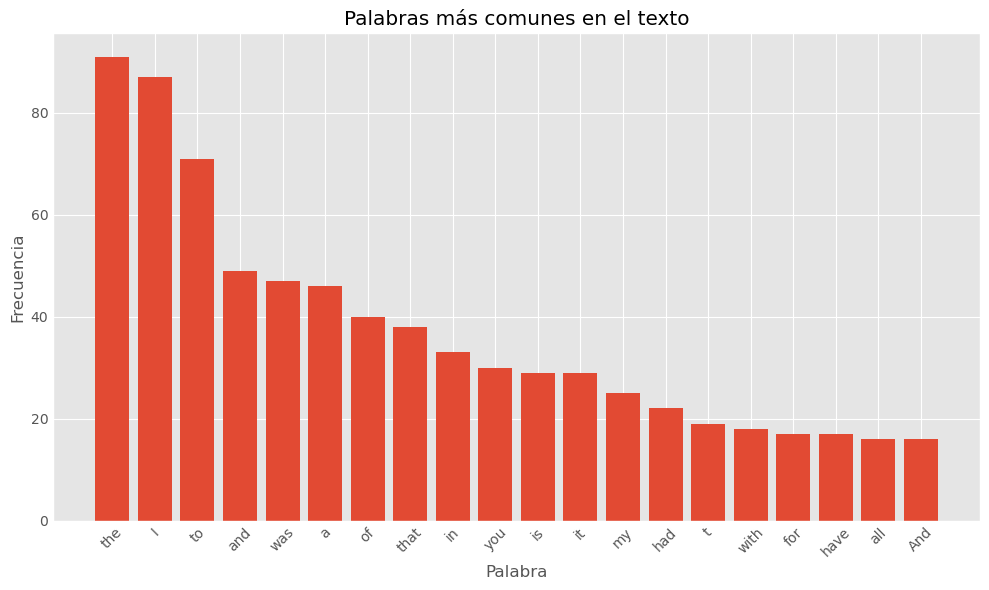

In [55]:
# Visualización de las 20 palabras mas comunes
# ===========================================
plot= cnt.most_common(20)

word, value = zip(*plot)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(word, value)
plt.xticks(rotation=45)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en el texto')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div class="alert alert-info" role="alert">
  <strong>Exercici 2:</strong> 
    <p> Treu les stopwords i realitza stemming al teu conjunt de dades.</p>
</div>

- Aplicamos lower casing para que el testo tenga el mismo formato

In [56]:
texto = texto.lower()

In [57]:
# Dividir el texto en sentencias individuales utilizando NLTK
# ==============================================================
sentences = sent_tokenize(texto)

for i in range(len(sentences)):
    print(sentences[i])

i am honored to be with you today at your commencement from one of the finest universities in the world.
i never graduated from college.
truth be told, this is the closest i ve ever gotten to a college graduation.
today i want to tell you three stories from my life.
that s it.
no big deal.
just three stories.the first story is about connecting the dots.i dropped out of reed college after the first 6 months, but then stayed around as a drop-in for another 18 months or so before i really quit.
so why did i drop out?it started before i was born.
my biological mother was a young, unwed college graduate student, and she decided to put me up for adoption.
she felt very strongly that i should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife.
except that when i popped out they decided at the last minute that they really wanted a girl.
so my parents, who were on a waiting list, got a call in the middle of the night asking: we have

In [58]:
#Eliminamos la puntuación para que nos sea mas facil manipular el texto.
# =======================================================================
texto = texto.translate(str.maketrans('', '', string.punctuation))

In [59]:
# Tokenización de palabras utilizando NLTK
# ============================================
tokens = word_tokenize(texto)

for i in range(20):
    print(tokens[i])

i
am
honored
to
be
with
you
today
at
your
commencement
from
one
of
the
finest
universities
in
the
world


- Buscamos y removemos las stopwords, que son palabras recurrentes que pueden tener importancia en la comunicación humana pero tienen poca relevancia para la maquina.

In [60]:
# Obtener la lista de palabras de parada de NLTK
stop_words = set(stopwords.words('english'))

# Filtrar las palabras de parada
filtered_text = [token for token in tokens if token not in stop_words]

for i in range(20):
    print(filtered_text[i])

honored
today
commencement
one
finest
universities
world
never
graduated
college
truth
told
closest
ever
gotten
college
graduation
today
want
tell


In [61]:
# Contamos la frequencia de cada palabra
# ===========================================
cnt_filtered = Counter()

for word in filtered_text:
    cnt_filtered[word] += 1
        
cnt_filtered.most_common(20)

[('life', 15),
 ('college', 13),
 ('one', 9),
 ('would', 9),
 ('years', 9),
 ('apple', 9),
 ('never', 8),
 ('dropped', 7),
 ('months', 7),
 ('looking', 7),
 ('want', 6),
 ('first', 6),
 ('everything', 6),
 ('later', 6),
 ('great', 6),
 ('know', 6),
 ('ever', 5),
 ('started', 5),
 ('decided', 5),
 ('parents', 5)]

- Se usa lemmatization para normalizar palabras en su representación mas simple y crear una lista para usos futuros

In [62]:
# Lematizador con NLTK
# ======================================
lemmatizer = WordNetLemmatizer()

lemma_text = [lemmatizer.lemmatize(token) for token in filtered_text]

# Comparar los lemas de las palabras filtradas
lemmas = [
        f"Token: {token}, lemma: {lemmatizer.lemmatize(token)}"
        for token in filtered_text]

for i in range(20):
    print(lemmas[i])

Token: honored, lemma: honored
Token: today, lemma: today
Token: commencement, lemma: commencement
Token: one, lemma: one
Token: finest, lemma: finest
Token: universities, lemma: university
Token: world, lemma: world
Token: never, lemma: never
Token: graduated, lemma: graduated
Token: college, lemma: college
Token: truth, lemma: truth
Token: told, lemma: told
Token: closest, lemma: closest
Token: ever, lemma: ever
Token: gotten, lemma: gotten
Token: college, lemma: college
Token: graduation, lemma: graduation
Token: today, lemma: today
Token: want, lemma: want
Token: tell, lemma: tell


In [63]:
# Contamos la frequencia de cada palabra
# ===========================================
cnt_lemmas = Counter()

for word in lemma_text:
    cnt_lemmas[word] += 1
    
cnt_lemmas.most_common(20)

[('life', 15),
 ('college', 13),
 ('year', 12),
 ('one', 10),
 ('would', 9),
 ('apple', 9),
 ('never', 8),
 ('want', 7),
 ('dropped', 7),
 ('month', 7),
 ('looking', 7),
 ('first', 6),
 ('everything', 6),
 ('later', 6),
 ('get', 6),
 ('great', 6),
 ('computer', 6),
 ('know', 6),
 ('ever', 5),
 ('story', 5)]

<div class="alert alert-info" role="alert">
  <strong>Exercici 3:</strong> 
    <p> Realitza sentiment analysis al teu conjunt de dades.</p>
</div>

In [64]:
# Analizamos las sentences para visualizar el rating de cada sentence y finalmente el total rating de las mismas
# ========================================================================================================================

ratings = []

def sentiment_scores(sentence):
     
    # Create a SentimentIntensityAnalyzer object.
    analyzer = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = analyzer.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", round(sentiment_dict['neg']*100,2), "% Negative")
    print("sentence was rated as ", round(sentiment_dict['neu']*100,2), "% Neutral")
    print("sentence was rated as ", round(sentiment_dict['pos']*100,2), "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
        ratings.append("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
        ratings.append("Negative")
    else :
        print("Neutral")
        ratings.append("Neutral")

for sentence in sentences:
    print(f"Sentence: {sentence}")
    sentiment_scores(sentence)
    print()
    
positive_count = ratings.count("Positive")
negative_count = ratings.count("Negative")
neutral_count = ratings.count("Neutral")
total_sentences = len(sentences)

positive_percentage = round((positive_count / total_sentences) * 100, 2)
negative_percentage = round((negative_count / total_sentences) * 100,2)
neutral_percentage = round((neutral_count / total_sentences) * 100,2)

print(f"Positive Count: {positive_percentage} %")
print(f"Negative Count: {negative_percentage} %")
print(f"Neutral Count: {neutral_percentage} %")

print("Final Overall Text Rating:")
if positive_percentage > negative_percentage and positive_percentage > neutral_percentage:
    print("Overall Text Rated As Positive")
elif negative_percentage > positive_percentage and negative_percentage > neutral_percentage:
    print("Overall Text Rated As Negative")
else:
    print("Overall Text Rated As Neutral")

Sentence: i am honored to be with you today at your commencement from one of the finest universities in the world.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  17.4 % Positive
Sentence Overall Rated As Positive

Sentence: i never graduated from college.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

Sentence: truth be told, this is the closest i ve ever gotten to a college graduation.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  83.9 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Positive

Sentence: today i want 

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

Sentence: and we designed it all into the mac.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

Sentence: it was the first computer with beautiful typography.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.5994}
sentence was rated as  0.0 % Negative
sentence was rated as  64.2 % Neutral
sentence was rated as  35.8 % Positive
Sentence Overall Rated As Positive

Sentence: if i had never dropped in on that single course in college, the mac would have never had multiple typefaces or proportionally spaced fonts.
Overall sentime

Overall sentiment dictionary is :  {'neg': 0.415, 'neu': 0.154, 'pos': 0.431, 'compound': 0.0258}
sentence was rated as  41.5 % Negative
sentence was rated as  15.4 % Neutral
sentence was rated as  43.1 % Positive
Sentence Overall Rated As Neutral

Sentence: i m convinced that the only thing that kept me going was that i loved what i did.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  64.5 % Neutral
sentence was rated as  35.5 % Positive
Sentence Overall Rated As Positive

Sentence: you ve got to find what you love.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Positive

Sentence: and that is as true for your work as it is for your lovers.
Overall sentiment dictionary is :  {'neg': 0.0, 'neu

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.1531}
sentence was rated as  0.0 % Negative
sentence was rated as  93.2 % Neutral
sentence was rated as  6.8 % Positive
Sentence Overall Rated As Positive

Sentence: sorry to be so dramatic, but it is quite true.your time is limited, so don t waste it living someone else s life.
Overall sentiment dictionary is :  {'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.7662}
sentence was rated as  29.7 % Negative
sentence was rated as  70.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

Sentence: don t be trapped by dogma , which is living with the results of other people s thinking.
Overall sentiment dictionary is :  {'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'compound': -0.5267}
sentence was rated as  19.5 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

Sentence: don t let the noise of ot

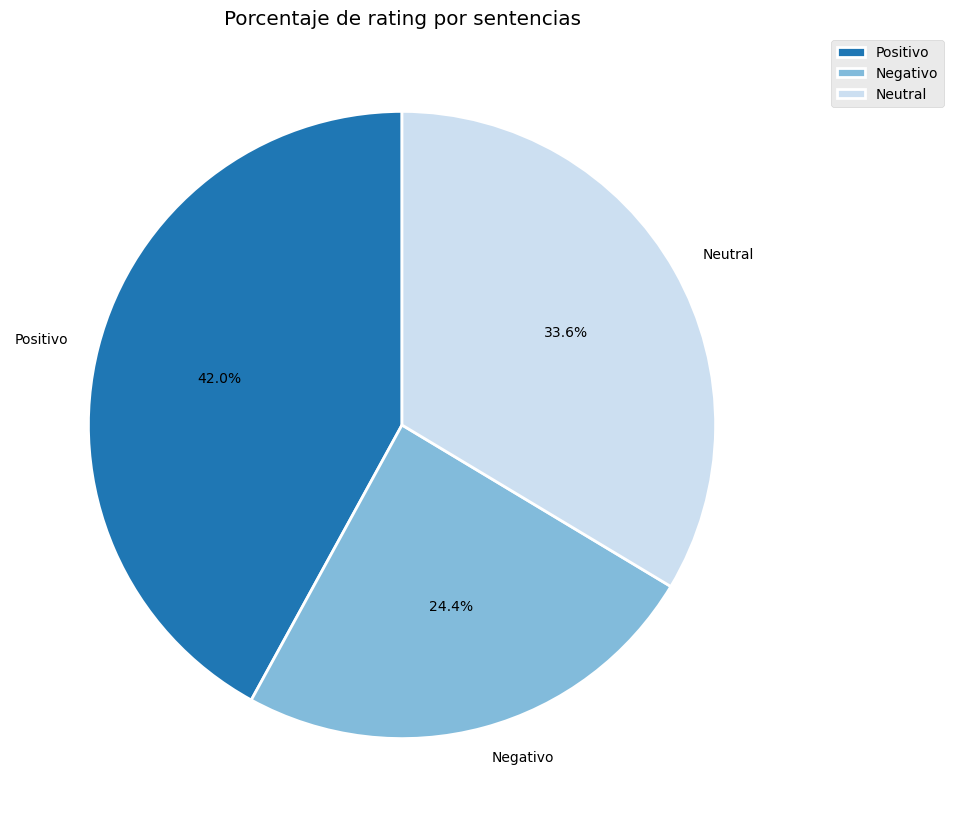

In [65]:
# Visualización
# ========================
labels = ['Positivo', 'Negativo', 'Neutral']
data = [positive_percentage, negative_percentage, neutral_percentage]

plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, 
       wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True})

ax.set_ylabel('')
ax.set_title("Porcentaje de rating por sentencias")
ax.legend(bbox_to_anchor=(1.2, 1))

plt.show()

In [71]:
# Analizamos el texto original por entero
# ========================================
# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Analyze some text
scores = analyzer.polarity_scores(texto)
print(scores)

# Classify the text as positive, neutral, or negative
if scores['compound'] >= 0.5:
    print("Text rated as: Positive")
elif scores['compound'] > -0.5:
    print("Text rated as: Neutral")
else:
    print("Text rated as: Negative")

{'neg': 0.087, 'neu': 0.752, 'pos': 0.16, 'compound': 0.9996}
Text rated as: Positive


In [23]:
# Analizamos el texto original por entero con TextBlob
# =====================================================
blob = TextBlob(texto)
sentiment = blob.sentiment
print(sentiment)

polarity=sentiment.polarity
subjectivity=sentiment.subjectivity

if polarity >= 0.5:
    print("The sentiment is positive.")
elif polarity >= 0.15:
    print("The sentiment is slightly positive.")
elif polarity > -0.15:
    print("The sentiment is neutral.")
elif polarity > -0.5:
    print("The sentiment is slightly negative.")
else:
    print("The sentiment is negative.")

if sentiment.subjectivity > 0.5:
    print("The text is highly subjective.")
elif sentiment.subjectivity > 0.2:
    print("The text is partially subjective.")
else:
    print("The text is primarily objective.")

Sentiment(polarity=0.18844301639638442, subjectivity=0.4916767602000762)
The sentiment is slightly positive.
The text is partially subjective.


***En conclusión:***
- Al parecer, la biblioteka Nltk asigna un valor general positivo al texto tanto en su conjunto que en su analisis por sentencias. Siendo un speech motivaciónal, parece una evaluación sensata.
- Referente a la bibilioteca BoxBlob, la evaluación parece ser mas general. El valor de subjectivity alcanza casi el 0.5, cosa que indica que el testo puede ser interpretado de forma diferente por cada uno. Siendo un motivational speech que incluye anegdotas y conotaciones a veces tristes, sorprende que la maquina de esa interpretación. 